From [https://notebook.community/empet/Math/DomainColoring](https://notebook.community/empet/Math/DomainColoring)

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import hsv_to_rgb

In [ ]:
def Hcomplex(z): # computes the hue corresponding to the complex number z
    H = np.angle(z) / (2 * np.pi) + 1
    return np.mod(H, 1)

In [ ]:
def func_vals(f, re, im,  N):

    l = re[1]-re[0]
    h = im[1]-im[0]

    resL = N * l # horizontal resolution
    resH = N * h # vertical resolution

    x = np.linspace(re[0], re[1], int(resL))
    y = np.linspace(im[0], im[1], int(resH))

    x, y = np.meshgrid(x,y)

    z = x + 1j*y

    return f(z)

In [ ]:
def domaincol_c(w, s):

    H = Hcomplex(w)
    S = s * np.ones(H.shape)
    modul = np.absolute(w)

    V = (1.0 - 1.0/( 1 + modul**2))**0.05

    HSV = np.dstack((H, S, V))
    RGB = hsv_to_rgb(HSV)
    return RGB

In [ ]:
def plot_domain(color_func, f, re=[-1,1], im= [-1,1], title='', s=0.9, N=200, daxis=None):
    w = func_vals(f, re, im, N)
    domc = color_func(w, s)
    plt.xlabel("$\Re(z)$")
    plt.ylabel("$\Im(z)$")
    plt.title(title)
    if(daxis):
         plt.imshow(domc, origin="lower", extent=[re[0], re[1], im[0], im[1]])

    else:
        plt.imshow(domc, origin="lower")
        plt.axis('off')

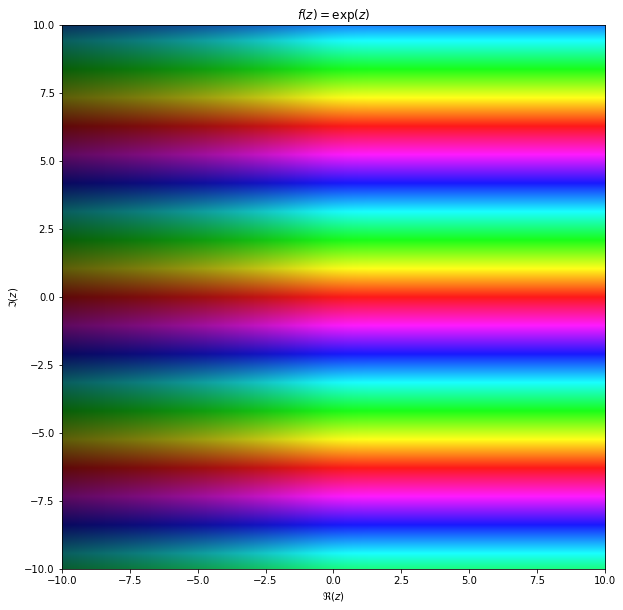

In [ ]:
f = lambda z: np.exp(z)
plot_domain(domaincol_c, f, re=[-10, 10], im= [-10, 10], title='$f(z)=\exp(z)$', daxis=True)

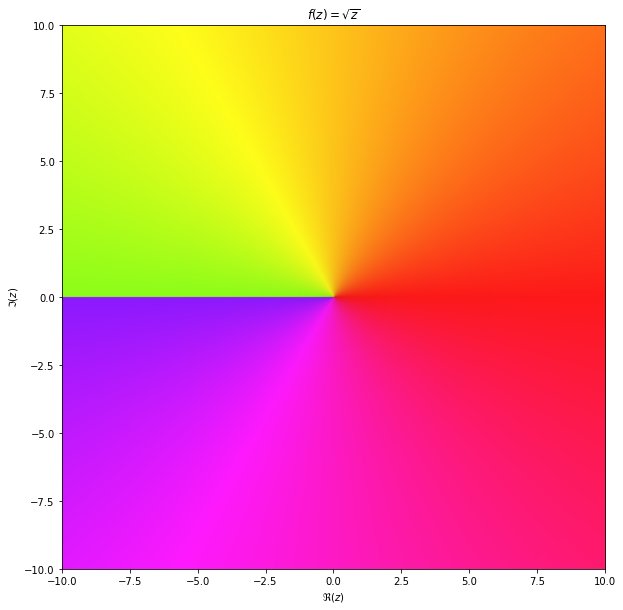

In [ ]:
f = lambda z: z**(1/2)
plot_domain(domaincol_c, f, re=[-10, 10], im= [-10, 10], title='$f(z)=\sqrt{z}$', daxis=True)

Power functions go around the rainbow as many times as the exponent:

$$z = r\,e^{i\theta} \mapsto z^2 = r \, e^{2i\theta}$$

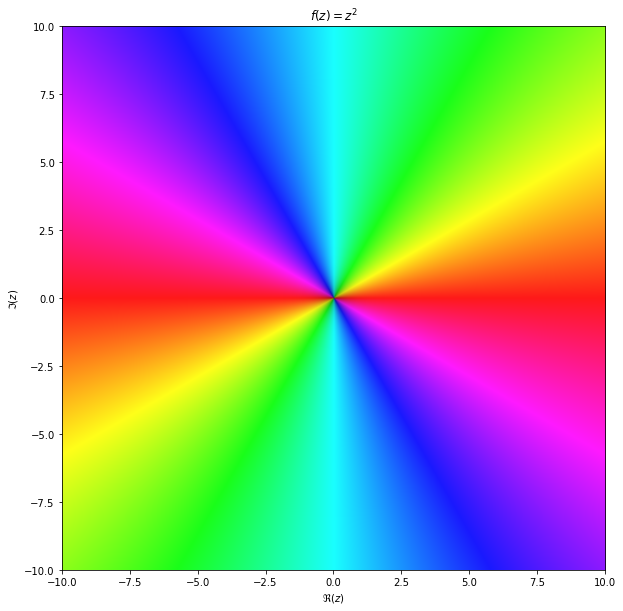

In [ ]:
f = lambda z: z**2
plot_domain(domaincol_c, f, re=[-10, 10], im= [-10, 10], title='$f(z)=z^2$', daxis=True)

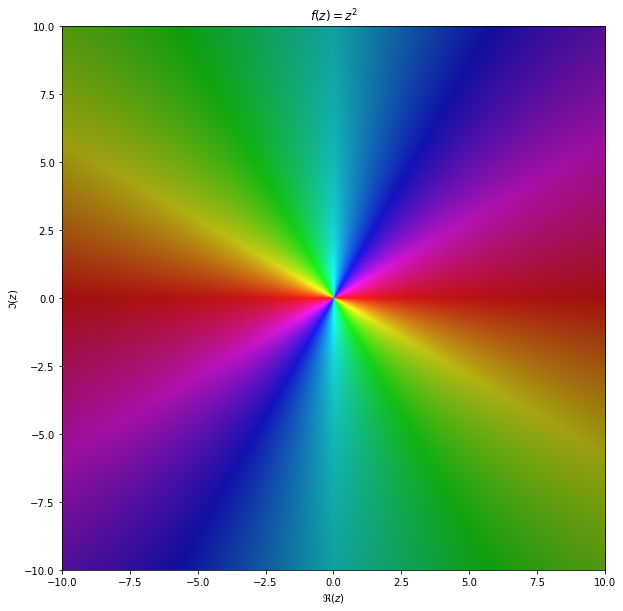

In [ ]:
f = lambda z: z**(-2) # A negative exponent changes the transitions from anticlockwise to clockwise
plot_domain(domaincol_c, f, re=[-10, 10], im= [-10, 10], title='$f(z)=z^2$', daxis=True)

### ROOTS OF UNITY

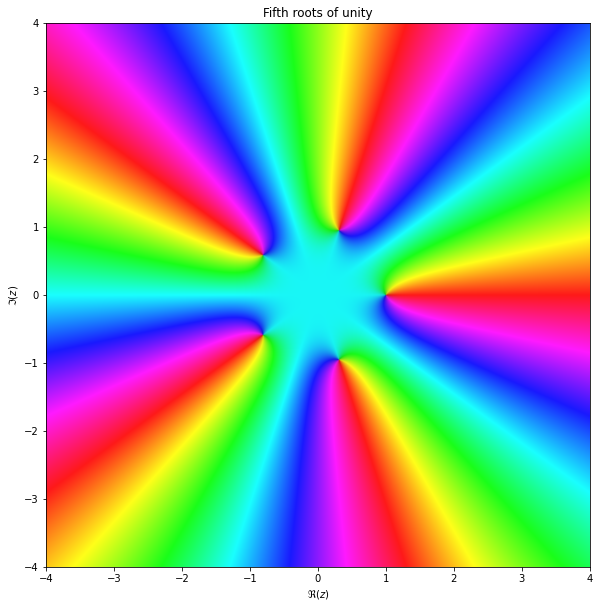

In [ ]:
f = lambda z: z**5 - 1
plot_domain(domaincol_c, f, re=[-4, 4], im= [-4, 4], title='Fifth roots of unity', daxis=True)

From [here](https://users.mai.liu.se/hanlu09/complex/domain_coloring.html):

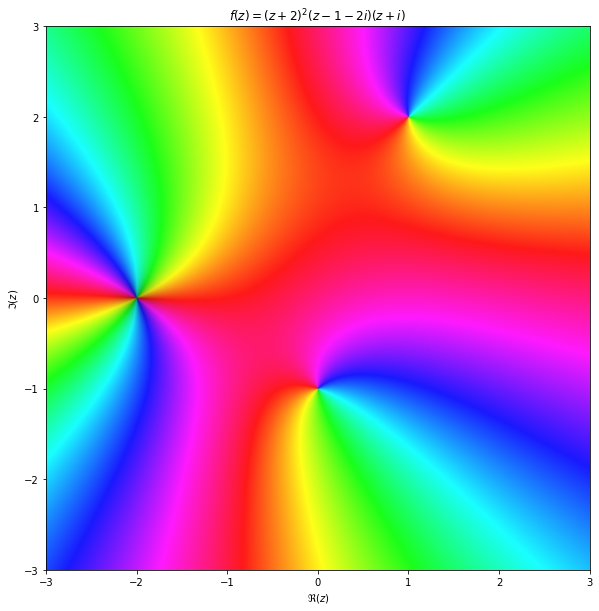

In [ ]:
f = lambda z: ( z + 2 )**2 * ( z - 1 - 2j ) * ( z + 1j )
plot_domain(domaincol_c, f, re=[-3, 3], im= [-3, 3], title='$f(z)={(z+2)}^2(z-1-2 i)(z+i)$', daxis=True)

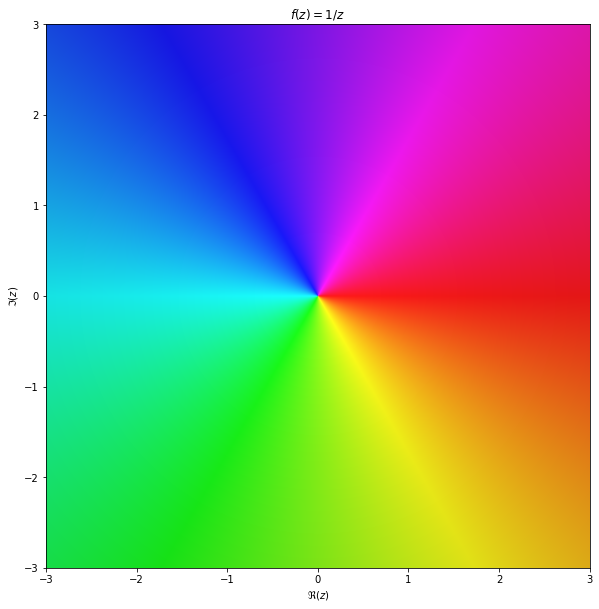

In [ ]:
f = lambda z: 1 / z
plot_domain(domaincol_c, f, re=[-3, 3], im= [-3, 3], title='$f(z)=1/z$', daxis=True)

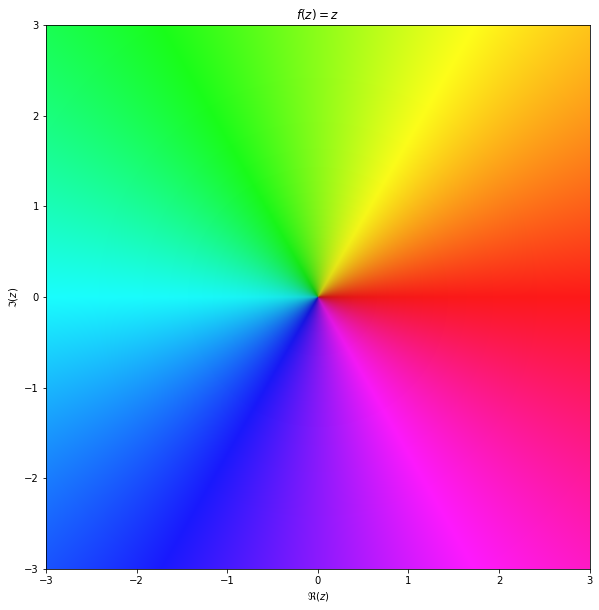

In [ ]:
f = lambda z: z
plot_domain(domaincol_c, f, re=[-3, 3], im= [-3, 3], title='$f(z)=z$', daxis=True)